In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

In [38]:
data=pd.read_csv("D:\\python project\\Chennai House Price Prediction\\Chennai.csv")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,5014.0,8.731264e+06,1.034261e+07,2000000.0,4095000.0,5782000.0,8675000.00,190000000.0
Area,5014.0,1.232992e+03,6.418418e+02,362.0,865.0,1067.0,1438.75,7240.0
No. of Bedrooms,5014.0,2.362984e+00,7.052523e-01,1.0,2.0,2.0,3.00,5.0
Resale,5014.0,9.712804e-02,2.961616e-01,0.0,0.0,0.0,0.00,1.0
MaintenanceStaff,5014.0,5.000997e+00,4.464256e+00,0.0,0.0,9.0,9.00,9.0
Gymnasium,5014.0,5.213602e+00,4.239118e+00,0.0,1.0,9.0,9.00,9.0
SwimmingPool,5014.0,5.160949e+00,4.296954e+00,0.0,0.0,9.0,9.00,9.0
LandscapedGardens,5014.0,5.114878e+00,4.346406e+00,0.0,0.0,9.0,9.00,9.0
JoggingTrack,5014.0,5.123055e+00,4.337706e+00,0.0,0.0,9.0,9.00,9.0
RainWaterHarvesting,5014.0,5.115277e+00,4.345983e+00,0.0,0.0,9.0,9.00,9.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  5014 non-null   int64 
 16  ClubHo

In [40]:
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])

# Check the DataFrame after conversion
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,117,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,74,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,53,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,160,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,48,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [41]:
x=data
y=data['Price']

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

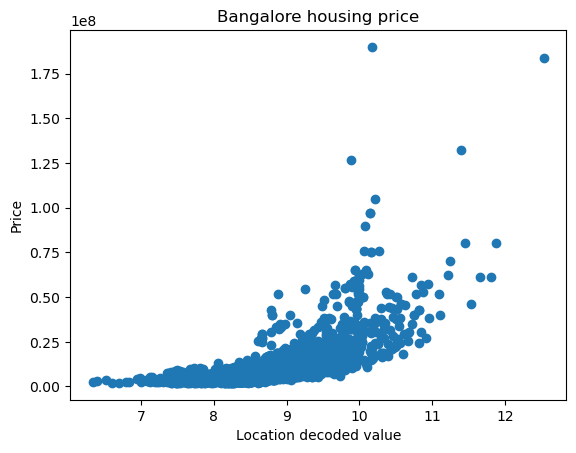

In [43]:
K=np.log(xtrain['Price']/xtrain['Area'])

plt.plot(K,xtrain['Price'],'o')
plt.xlabel('Location decoded value')
plt.ylabel('Price')
plt.title('Bangalore housing price')
plt.show()

In [44]:
matrix_corr=xtrain.corr()
matrix_corr['Price']

Price                  1.000000
Area                   0.450440
Location               0.029884
No. of Bedrooms        0.318114
Resale                 0.077057
MaintenanceStaff       0.032578
Gymnasium              0.044066
SwimmingPool           0.043703
LandscapedGardens      0.041777
JoggingTrack           0.034346
RainWaterHarvesting    0.035505
IndoorGames            0.036577
ShoppingMall           0.032267
Intercom               0.040924
SportsFacility         0.036287
ATM                    0.030756
ClubHouse              0.041128
School                 0.031288
24X7Security           0.038302
PowerBackup            0.041661
CarParking             0.036149
StaffQuarter           0.032491
Cafeteria              0.033026
MultipurposeRoom       0.034198
Hospital               0.031538
WashingMachine         0.033406
Gasconnection          0.034546
AC                     0.032830
Wifi                   0.031475
Children'splayarea     0.040520
LiftAvailable          0.035842
BED     

In [45]:
def na_remove(data):
    data.replace(9,0.5,inplace=True)

In [46]:
def data_processing(data):
    K=np.log(data['Price']/data['Area'])
    data['Location']=K
    house_feature=data.drop(['Price'],axis=1)
    my_pipeline=Pipeline([('rem',na_remove(house_feature)),
                          ('std',StandardScaler())   
                         ])
    return my_pipeline.fit_transform(house_feature)

In [47]:
houseprice_train=np.log(xtrain['Price'])
data_train=data_processing(xtrain)

In [48]:
data_train.shape

(4011, 39)

In [49]:
model1=LinearRegression().fit(data_train,houseprice_train)

In [50]:
model2=Ridge().fit(data_train,houseprice_train)

In [51]:
model3=DecisionTreeRegressor().fit(data_train,houseprice_train)

In [52]:
model4=RandomForestRegressor().fit(data_train,houseprice_train)

In [53]:
model1_pred=model1.predict(data_train)
model2_pred=model2.predict(data_train)
model3_pred=model3.predict(data_train)
model4_pred=model4.predict(data_train)

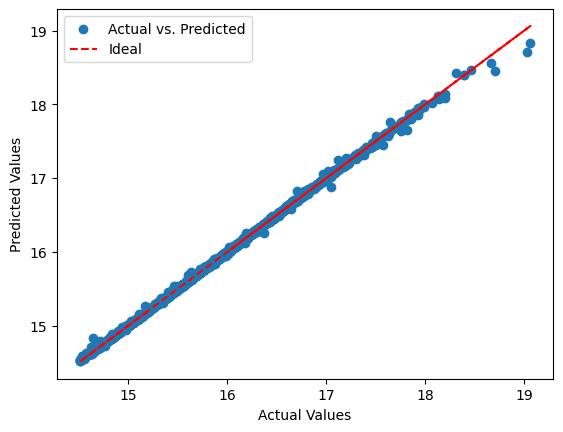

In [54]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(houseprice_train, model4_pred, label='Actual vs. Predicted')

# Add a line representing the ideal relationship (y = x)
plt.plot(houseprice_train, houseprice_train, color='red', linestyle='--', label='Ideal')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

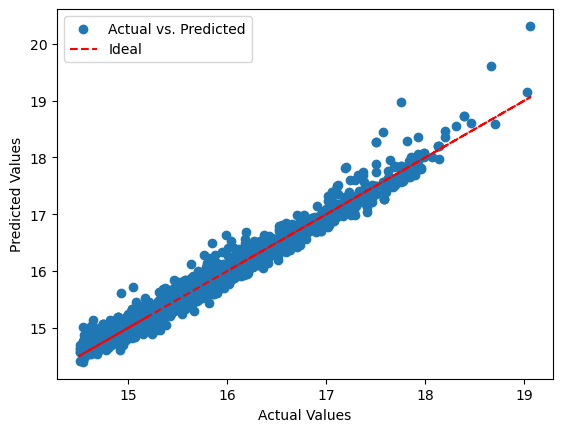

In [55]:
plt.scatter(houseprice_train, model1_pred, label='Actual vs. Predicted')

# Add a line representing the ideal relationship (y = x)
plt.plot(houseprice_train, houseprice_train, color='red', linestyle='--', label='Ideal')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

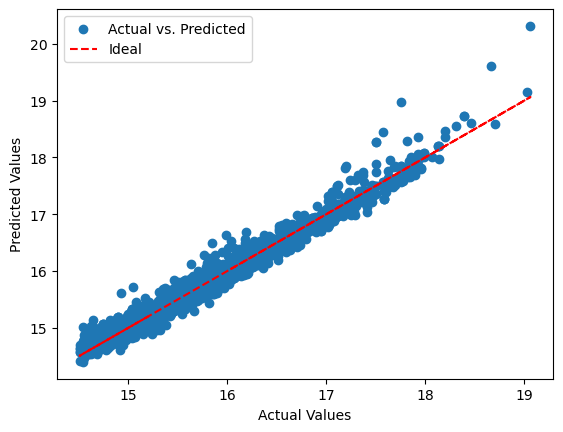

In [56]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(houseprice_train, model2_pred, label='Actual vs. Predicted')

# Add a line representing the ideal relationship (y = x)
plt.plot(houseprice_train, houseprice_train, color='red', linestyle='--', label='Ideal')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

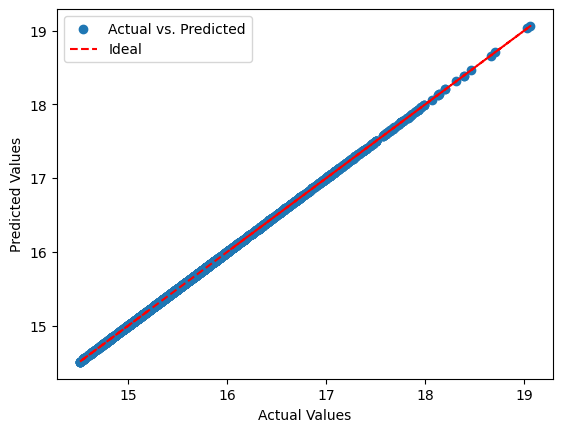

In [57]:
plt.scatter(houseprice_train, model3_pred, label='Actual vs. Predicted')

# Add a line representing the ideal relationship (y = x)
plt.plot(houseprice_train, houseprice_train, color='red', linestyle='--', label='Ideal')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [58]:
houseprice_test=xtest['Price']

In [59]:
data_test=data_processing(xtest)

In [60]:
model1_test=np.exp(model1.predict(data_test))
model2_test=np.exp(model2.predict(data_test))
model3_test=np.exp(model3.predict(data_test))
model4_test=np.exp(model4.predict(data_test))

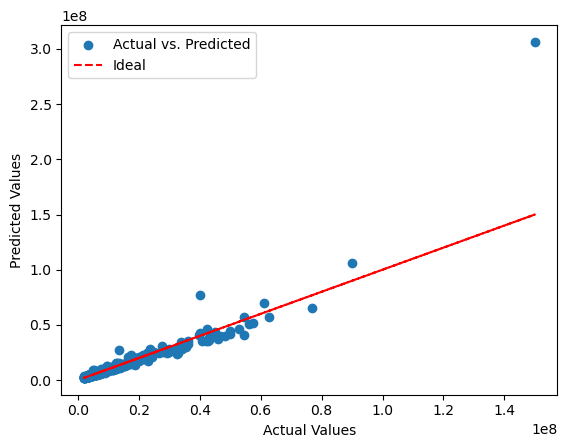

In [61]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(houseprice_test, model1_test, label='Actual vs. Predicted')

# Add a line representing the ideal relationship (y = x)
plt.plot(houseprice_test, houseprice_test, color='red', linestyle='--', label='Ideal')

# Add labels and a legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [62]:
model1_r2=r2_score(model1_test,houseprice_test)

model2_r2=r2_score(model2_test,houseprice_test)

model3_r2=r2_score(model3_test,houseprice_test)

model4_r2=r2_score(model4_test,houseprice_test)

In [63]:
print("model1_error:{}\nmodel2_error:{}\nmodel3_error:{}\nmodel4_error:{}".format(model1_r2,model2_r2,model3_r2,model4_r2))

model1_error:0.8273638691491384
model2_error:0.8276463310837522
model3_error:0.9643993250885589
model4_error:0.987761084057196
